In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install

In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2443, done.
remote: Total 2443 (delta 0), reused 0 (delta 0), pack-reused 2443
Receiving objects: 100% (2443/2443), 8.13 MiB | 13.41 MiB/s, done.
Resolving deltas: 100% (1570/1570), done.


In [3]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 9.6 MB/s 
     |████████████████████████████████| 1.7 MB 47.7 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 180 kB 72.8 MB/s 
     |████████████████████████████████| 97 kB 8.9 MB/s 
     |████████████████████████████████| 140 kB 67.2 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=2c126eab959ce38b7887b7ec66a5c5d74bfebffc572d7d603bfa4a4cc000ed02
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=3f0276345237185b529506f1850f605bb2c50d40ff58f4f2f4800c427860a80d
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl 

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_pix2pix_model.sh day2night #only for first training round

Move latest pretrained model:

In [5]:
!mkdir /content/pytorch-CycleGAN-and-pix2pix/checkpoints
!mkdir /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix
!cp -r /content/drive/MyDrive/Colab_Inputs/latest_net_G_09.pth /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix/latest_net_G.pth
!cp -r /content/drive/MyDrive/Colab_Inputs/latest_net_D_09.pth /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix/latest_net_D.pth

Download dataset:

In [ ]:
!gdown --id 1XH1z39KGSnTI5oxCnhJufiiBjVrQSXip -O /content/Fantasy_Landscape_Dataset.zip
!unzip /content/Fantasy_Landscape_Dataset.zip

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
%cd /content/pytorch-CycleGAN-and-pix2pix

/content


In [ ]:
!python train.py --dataroot /content/drive/MyDrive/Colab_Inputs/Fantasy_Landscapes/Training_Dataset --name fantasy_landscapes_pix2pix --model pix2pix --direction BtoA --use_wandb --n_epochs 500 --continue_train

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Colab_Inputs/Fantasy_Landscapes/Training_Dataset	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                          

In [ ]:
!cp /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix/latest_net_D.pth /content/drive/MyDrive/Colab_Inputs
!cp /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix/latest_net_G.pth /content/drive/MyDrive/Colab_Inputs

In [12]:
!cp /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix/495_net_D.pth /content/drive/MyDrive/Colab_Inputs
!cp /content/pytorch-CycleGAN-and-pix2pix/checkpoints/fantasy_landscapes_pix2pix/495_net_G.pth /content/drive/MyDrive/Colab_Inputs

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

FantasyLandscape_pretrained


In [ ]:
!python test.py --dataroot /content/Fantasy_Landscape_Dataset/content/drive/MyDrive/Colab_Inputs/Fantasy_Landscapes/Training_Dataset --direction BtoA --model pix2pix --name FantasyLandscape_pretrained --use_wandb

# Visualize

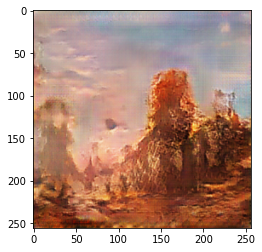

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape_pretrained/test_latest/images/Copy of Image_174_fake_B.png')
plt.imshow(img)

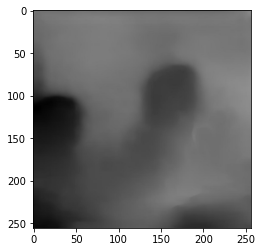

In [ ]:
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape_pretrained/test_latest/images/Copy of Image_174_real_A.png')
plt.imshow(img)

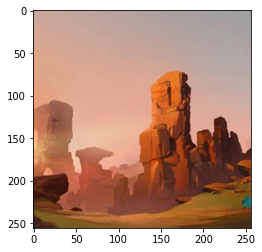

In [ ]:
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape_pretrained/test_latest/images/Copy of Image_174_real_B.png')
plt.imshow(img)